## EDA de Contaminacion sonora

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_noise = pd.read_csv("Noise.csv")
df_noise.head()


,split,borough,latitude,longitude,year,week,day,hour,1-1_small-sounding-engine_presence,1-2_medium-sounding-engine_presence,1-3_large-sounding-engine_presence,1-X_engine-of-uncertain-size_presence,5-1_car-horn_presence,5-2_car-alarm_presence,1-1_small-sounding-engine_proximity,1-2_medium-sounding-engine_proximity,1-3_large-sounding-engine_proximity,1-X_engine-of-uncertain-size_proximity
0,test,Manhattan,40.72951,-73.99388,2019,43,Friday,8,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled
1,test,Manhattan,40.72951,-73.99388,2019,43,Friday,8,not present,not present,present,not present,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled
2,test,Manhattan,40.72951,-73.99388,2019,43,Friday,8,not present,present,not present,not present,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled
3,test,Manhattan,40.72951,-73.99388,2019,43,Friday,8,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled
4,test,Manhattan,40.72951,-73.99388,2019,43,Friday,8,not present,present,present,not present,not present,not present,not labeled,not labeled,not labeled,not labeled


## Verificamos si tiene valores nulos

In [3]:
print(df_noise.isnull().sum())

split                                     0
borough                                   0
latitude                                  0
longitude                                 0
year                                      0
week                                      0
day                                       0
hour                                      0
1-1_small-sounding-engine_presence        0
1-2_medium-sounding-engine_presence       0
1-3_large-sounding-engine_presence        0
1-X_engine-of-uncertain-size_presence     0
5-1_car-horn_presence                     0
5-2_car-alarm_presence                    0
1-1_small-sounding-engine_proximity       0
1-2_medium-sounding-engine_proximity      0
1-3_large-sounding-engine_proximity       0
1-X_engine-of-uncertain-size_proximity    0
dtype: int64


## Resumen Estadistico

In [4]:
print(df_noise.describe())

          latitude     longitude          year
count  62022.00000  62022.000000  62022.000000
mean      40.73031    -73.993044   2017.591000
std        0.01348      0.010074      0.778948
min       40.67517    -74.015760   2016.000000
25%       40.72898    -73.996820   2017.000000
50%       40.73033    -73.995000   2017.000000
75%       40.73142    -73.992860   2018.000000
max       40.77991    -73.851840   2019.000000


## Cantidad de registros de contaminacion sonora por Distrito

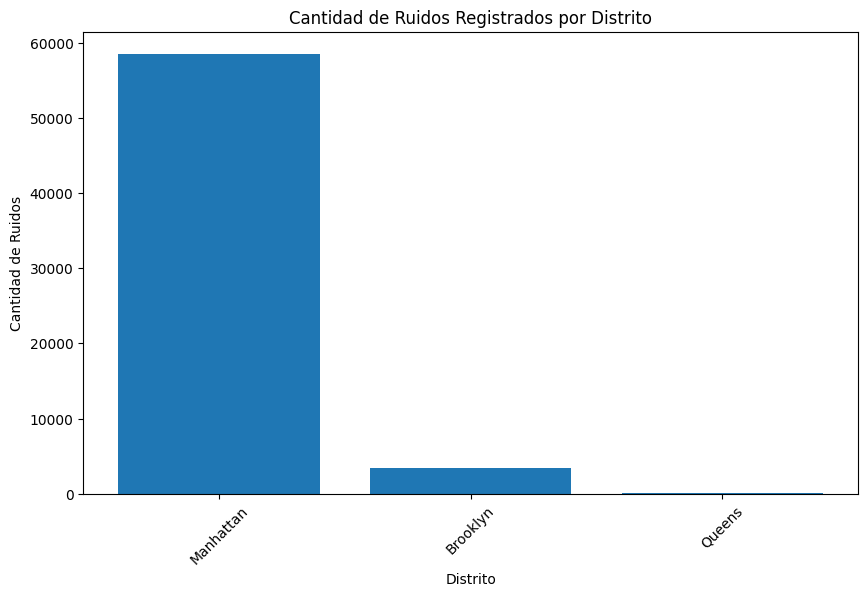

In [5]:
# Agrupar los datos por distrito y contar la cantidad de registros en cada uno
borough_counts = df_noise['borough'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(borough_counts.index, borough_counts.values)
plt.title('Cantidad de Ruidos Registrados por Distrito')
plt.xlabel('Distrito')
plt.ylabel('Cantidad de Ruidos')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()

## Top 10 de las semanas de cada año donde ubo mas contaminacion sonora

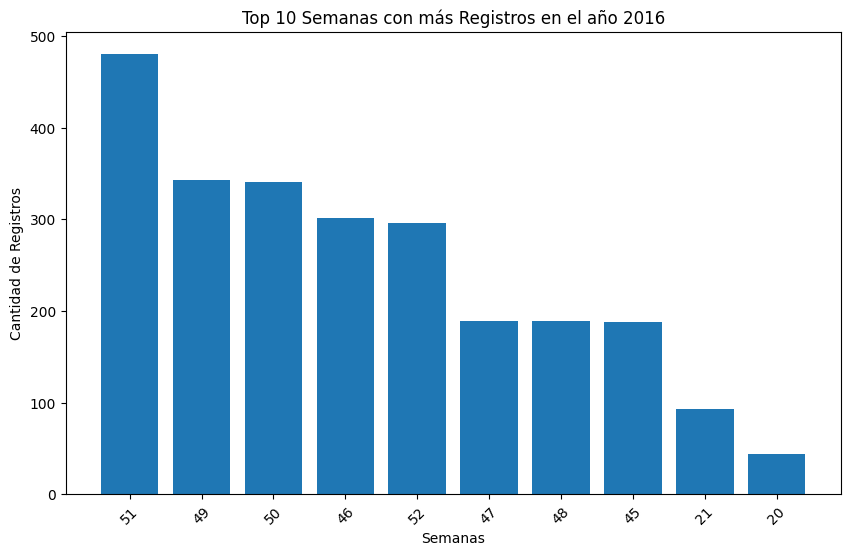

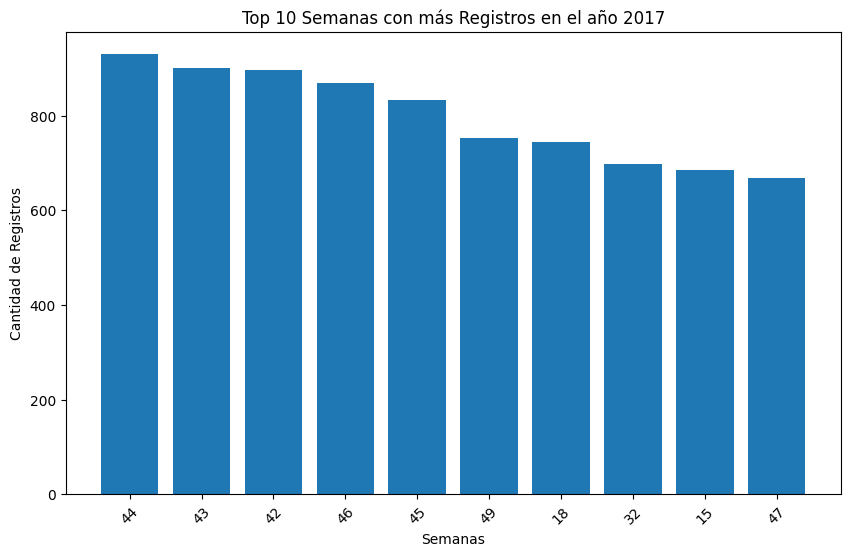

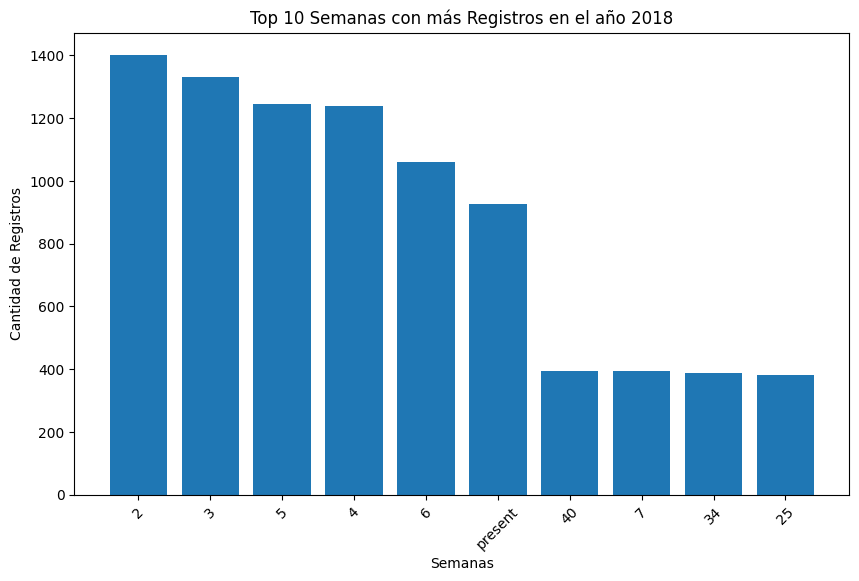

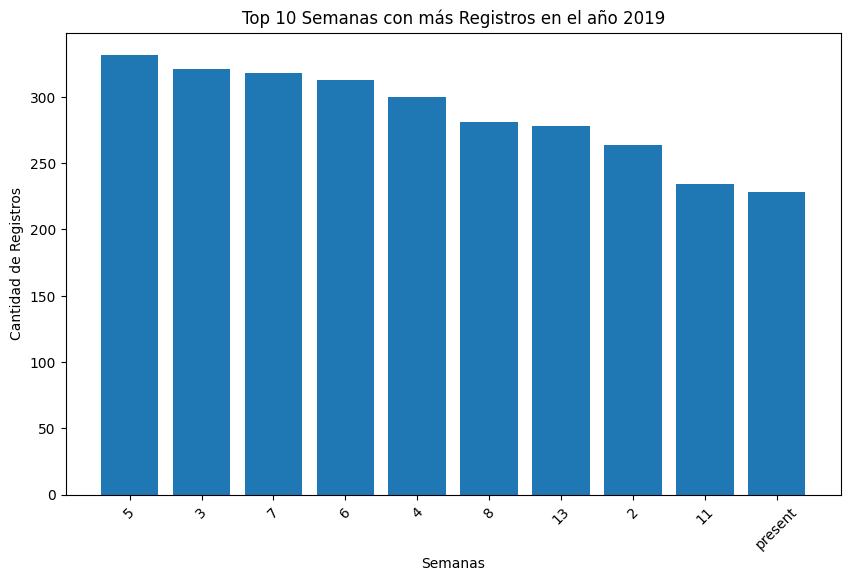

In [6]:
# Filtrar los datos para cada año
years = [2016, 2017, 2018, 2019]
top_weeks_by_year = {}

for year in years:
    filtered_data = df_noise[df_noise['year'] == year]
    top_weeks = filtered_data['week'].value_counts().head(10)
    top_weeks_by_year[year] = top_weeks

# Crear un gráfico de barras para cada año
for year in years:
    top_weeks = top_weeks_by_year[year]
    plt.figure(figsize=(10, 6))
    plt.bar(top_weeks.index, top_weeks.values)
    plt.title(f'Top 10 Semanas con más Registros en el año {year}')
    plt.xlabel('Semanas')
    plt.ylabel('Cantidad de Registros')
    plt.xticks(rotation=45)
    plt.show()


## Matriz de correlacion de todas las columnas

C:\Users\jerob\AppData\Local\Temp\ipykernel_8796\457281728.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric[column] = df_numeric[column].apply(lambda x: 1 if x == 'present' else 0)
C:\Users\jerob\AppData\Local\Temp\ipykernel_8796\457281728.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric[column] = df_numeric[column].apply(lambda x: 1 if x == 'present' else 0)
C:\Users\jerob\AppData\Local\Temp\ipykernel_8796\457281728.py:25: SettingWithCopyWarning: 
A value is trying to be set o

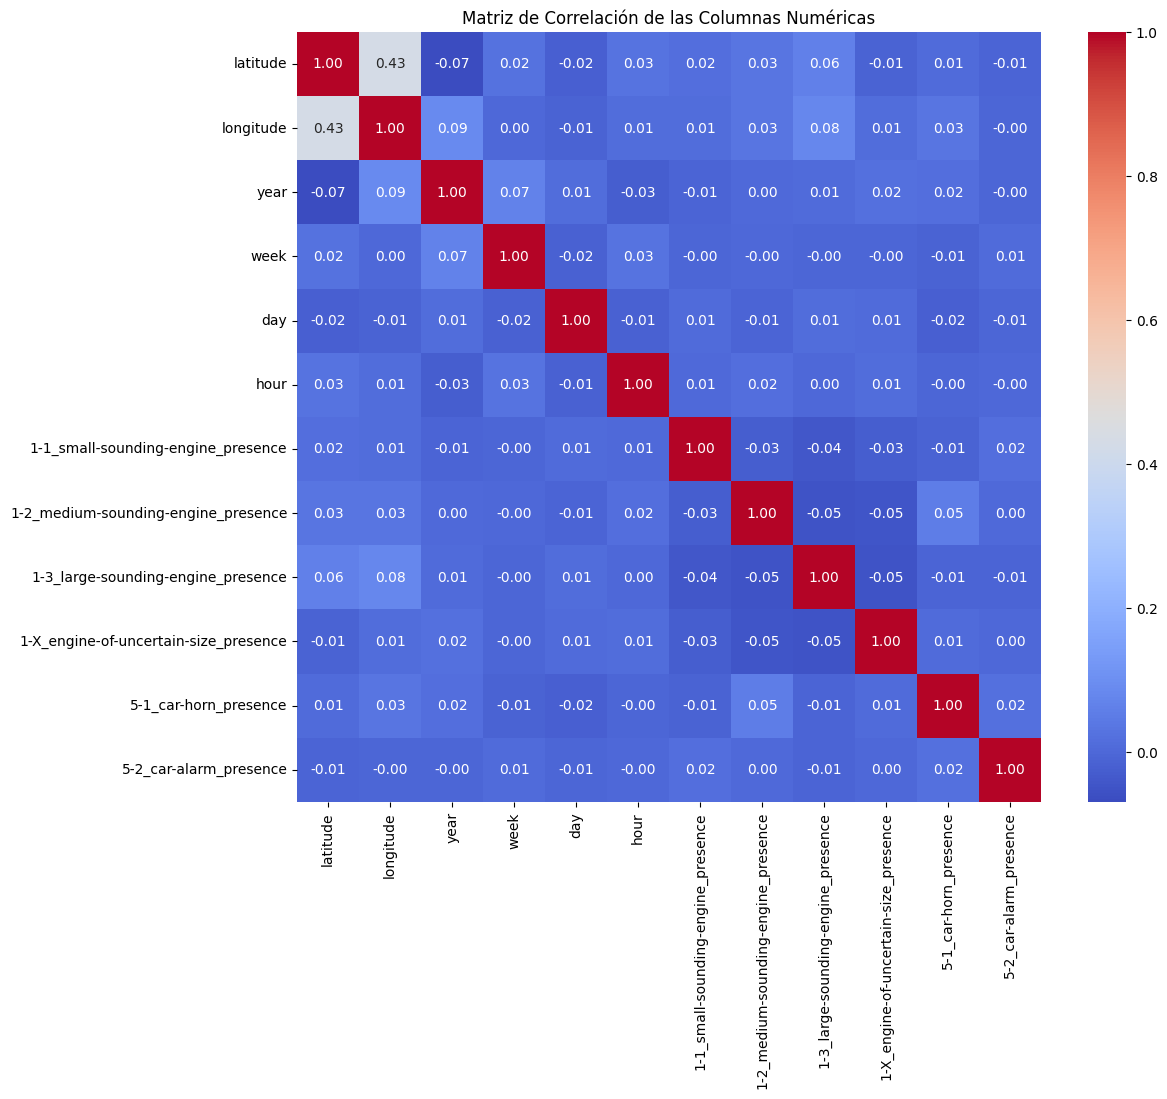

In [7]:
# Selecciona las columnas numéricas para la matriz de correlación
columnas_numericas = [
    "latitude",
    'longitude',
    "year",
    'week',
    'day',
    'hour',
    '1-1_small-sounding-engine_presence',
    '1-2_medium-sounding-engine_presence',
    '1-3_large-sounding-engine_presence',
    '1-X_engine-of-uncertain-size_presence',
    '5-1_car-horn_presence',
    '5-2_car-alarm_presence'
]

# Filtra el DataFrame para incluir solo las columnas numéricas
df_numeric = df_noise[columnas_numericas]

# Convertir columnas "present" o "absent" a variables binarias
for column in df_numeric.columns:
    if df_numeric[column].dtype == 'object':
        df_numeric[column] = df_numeric[column].apply(lambda x: 1 if x == 'present' else 0)


# Calcula la matriz de correlación
correlation_matrix = df_numeric.corr()

# Crea un mapa de calor (heatmap) para visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de las Columnas Numéricas')
plt.show()


In [8]:
df_noise.head()

,split,borough,latitude,longitude,year,week,day,hour,1-1_small-sounding-engine_presence,1-2_medium-sounding-engine_presence,1-3_large-sounding-engine_presence,1-X_engine-of-uncertain-size_presence,5-1_car-horn_presence,5-2_car-alarm_presence,1-1_small-sounding-engine_proximity,1-2_medium-sounding-engine_proximity,1-3_large-sounding-engine_proximity,1-X_engine-of-uncertain-size_proximity
0,test,Manhattan,40.72951,-73.99388,2019,43,Friday,8,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled
1,test,Manhattan,40.72951,-73.99388,2019,43,Friday,8,not present,not present,present,not present,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled
2,test,Manhattan,40.72951,-73.99388,2019,43,Friday,8,not present,present,not present,not present,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled
3,test,Manhattan,40.72951,-73.99388,2019,43,Friday,8,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled
4,test,Manhattan,40.72951,-73.99388,2019,43,Friday,8,not present,present,present,not present,not present,not present,not labeled,not labeled,not labeled,not labeled


## Grafico de violin de los ruidos menores, mediano, largos y de bocina a lo largo de los años

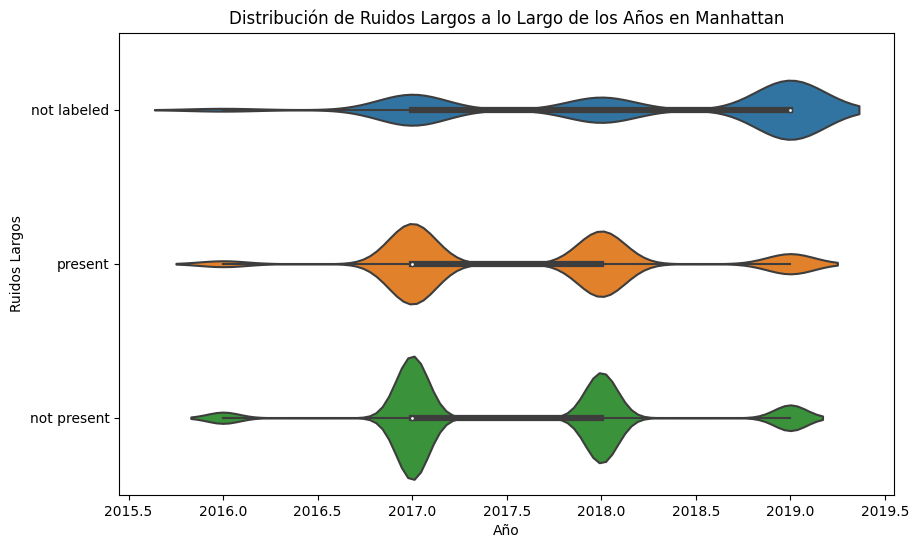

In [9]:
# Filtrar los datos para Manhattan y la columna "ruidos largos"
manhattan_data = df_noise[df_noise['borough'] == 'Manhattan']
ruidos_largos = manhattan_data['1-3_large-sounding-engine_presence']

# Crear un gráfico de violín
plt.figure(figsize=(10, 6))
sns.violinplot(x='year', y=ruidos_largos, data=manhattan_data)
plt.title('Distribución de Ruidos Largos a lo Largo de los Años en Manhattan')
plt.xlabel('Año')
plt.ylabel('Ruidos Largos')
plt.show()


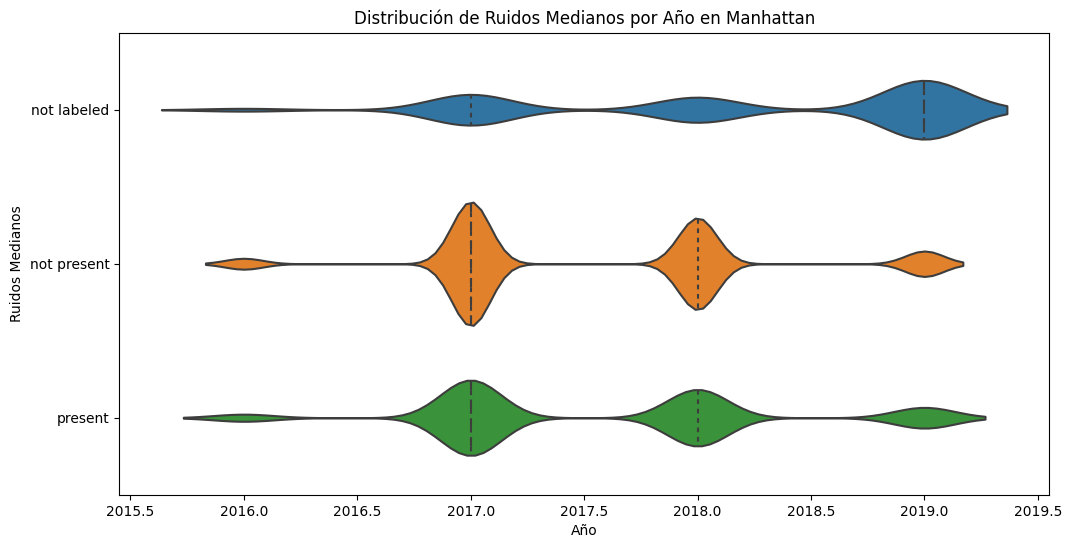

In [10]:
# Filtrar los datos para Manhattan
manhattan_data = df_noise[df_noise['borough'] == 'Manhattan']

# Seleccionar la columna de "ruidos medianos" y la columna de "year"
data_to_plot = manhattan_data[['1-2_medium-sounding-engine_presence', 'year']]

# Crear un gráfico de violín
plt.figure(figsize=(12, 6))
sns.violinplot(x='year', y='1-2_medium-sounding-engine_presence', data=data_to_plot, inner='quartiles')
plt.title('Distribución de Ruidos Medianos por Año en Manhattan')
plt.xlabel('Año')
plt.ylabel('Ruidos Medianos')
plt.show()


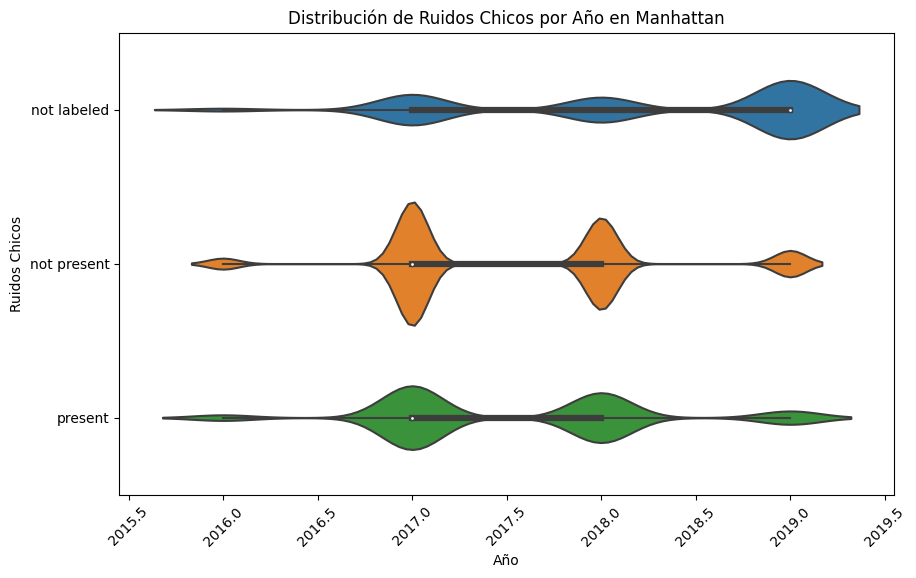

In [11]:
# Filtrar los datos para Manhattan y para la columna de ruidos chicos
manhattan_data = df_noise[df_noise['borough'] == 'Manhattan']

# Seleccionar las columnas de interés
columna_ruidos_chicos = "1-1_small-sounding-engine_presence"

# Crear un gráfico de violín
plt.figure(figsize=(10, 6))
sns.violinplot(data=manhattan_data, x='year', y=columna_ruidos_chicos)
plt.title('Distribución de Ruidos Chicos por Año en Manhattan')
plt.xlabel('Año')
plt.ylabel('Ruidos Chicos')
plt.xticks(rotation=45)
plt.show()


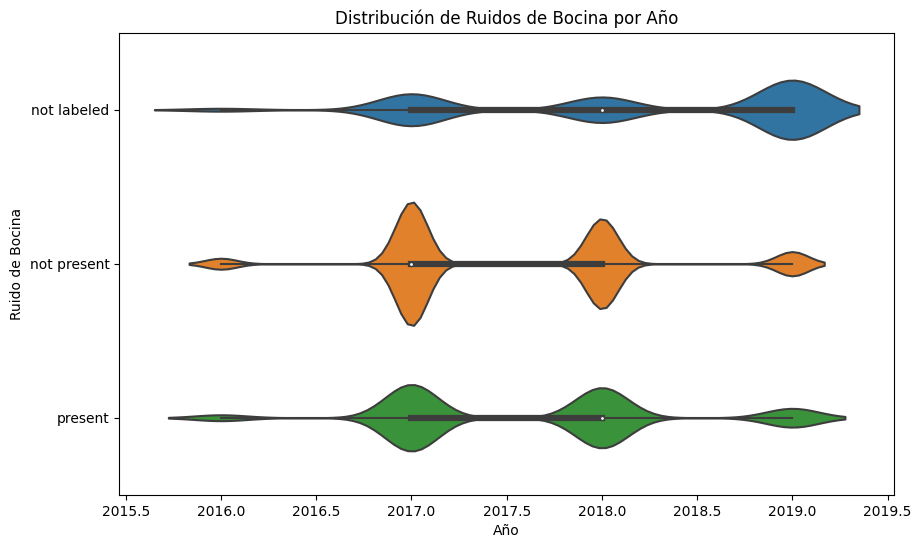

In [12]:
# Filtrar los datos para Manhattan y la columna de ruidos de bocina
manhattan_data = df_noise[df_noise['borough'] == 'Manhattan']
columna_ruido_bocina = '5-1_car-horn_presence'

# Crear el gráfico de violín
plt.figure(figsize=(10, 6))
sns.violinplot(data=manhattan_data, x='year', y=columna_ruido_bocina)
plt.title('Distribución de Ruidos de Bocina por Año')
plt.xlabel('Año')
plt.ylabel('Ruido de Bocina')
plt.show()


In [13]:
df_noise.head()

,split,borough,latitude,longitude,year,week,day,hour,1-1_small-sounding-engine_presence,1-2_medium-sounding-engine_presence,1-3_large-sounding-engine_presence,1-X_engine-of-uncertain-size_presence,5-1_car-horn_presence,5-2_car-alarm_presence,1-1_small-sounding-engine_proximity,1-2_medium-sounding-engine_proximity,1-3_large-sounding-engine_proximity,1-X_engine-of-uncertain-size_proximity
0,test,Manhattan,40.72951,-73.99388,2019,43,Friday,8,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled
1,test,Manhattan,40.72951,-73.99388,2019,43,Friday,8,not present,not present,present,not present,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled
2,test,Manhattan,40.72951,-73.99388,2019,43,Friday,8,not present,present,not present,not present,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled
3,test,Manhattan,40.72951,-73.99388,2019,43,Friday,8,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled
4,test,Manhattan,40.72951,-73.99388,2019,43,Friday,8,not present,present,present,not present,not present,not present,not labeled,not labeled,not labeled,not labeled
